<a href="https://colab.research.google.com/github/Luca-Davis/Luca-Bio108-Tutorial/blob/main/Luca_davis_Coding_Tutorial_draft_4_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Has precipitation decreased more in Montana and Wyoming's glaciers than in those states' area as a whole????


#Inspiration
I was inspired by Gonzalez et al (2018) on the disproportionate impacts of warming in the U.S. This paper hypothesized that climate change disproportionately affects U.S national parks compared to the U.S as a whole, finding that mean annual temperature increased 1.0 °C ± 0.2 between 1895 and 2010, double the rate of the u.s as a whole. These findings suggest that national parks are more exposed to the effects of climate change.

The Gonzales paper claimed that temperatures were increasing faster in national parks because they are more often in arctic regions and higher elevations.


#Objectives and questions I aim to take on

The Gonzales paper revealed how unique natural resources can be disproportionately vulnerable to climate change. This made me curious if a unique natural resource like glaciers might be disproportionately vulnerable.
Having a precise understanding of glacial trends is crucial. Glaicers have an indirect impact of wildife and fishiries. Glacier melt can drive phytoplankton blooms which is the base of aquatic and marine food chains.


# Pre Processing the Data


##Data Sources
###Lower 48 Glaciers:
https://nsidc.org/data/glacier_inventory/
### Absolute change in annual precipitation:
https://www.fs.usda.gov/rm/boise/AWAE/projects/NFS-regional-climate-change-maps/categories/us-raster-layers.html
###Meta data for precipitation change fix link
https://data-usfs.hub.arcgis.com/datasets/usfs::absolute-change-in-annual-precipitation-conus-image-service/about







###Install Neccesary Packages

In [ ]:
###Install Neccesary Packages
!pip install earthpy
! pip install rasterstats
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.7 MB/s eta 0:00:00


Steps to get the data for tutorial

![image](https://www.kanbanchi.com/wp-content/uploads/2024/04/add-shortcut-drive.png)

In [ ]:
all_data = "/content/drive/MyDrive"

Glacier = "/content/drive/MyDrive" + "GLACIER48/USA_Glaciers_CopyFeatures_ExportFeatures.shp"

###Mount drive and make quick plot of both layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Vectors

##Glacier Vector

In [ ]:
# assign glacier file to variable (contains more than just shp!)
g_path = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/GLACIER48/USA_Glaciers_CopyFeatures_ExportFeatures.shp")

#using geopandas to read glacier file and get coordinate system and show the data frame.
glacier = gpd.read_file(g_path)
print(glacier.crs)
print(glacier.shape)

glacier.head(20)




EPSG:3857
(1523, 12)


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,geometry
0,91690.225,1858.679,1488.0,-121.66363,45.34709,snow or ice body,USGS DRG,100K,None,2647.636765,1.860452e+05,"POLYGON ((-13543448.219 5676035.509, -13543509..."
1,34939.127,1251.714,1489.0,-121.67248,45.34688,snow or ice body,USGS DRG,100K,None,1778.595524,7.089431e+04,"POLYGON ((-13544270.929 5675977.907, -13544314..."
2,161450.661,2876.548,502.0,-120.93059,47.70061,snow or ice body,USGS DRG,100K,None,4275.313319,3.572532e+05,"POLYGON ((-13461380.088 6056475.46, -13461515...."
3,8573.238,451.969,1490.0,-121.71219,45.34819,snow or ice body,USGS DRG,100K,None,640.940289,1.739640e+04,"POLYGON ((-13548893.947 5676643.656, -13548911..."
4,186062.010,1845.828,503.0,-121.16056,47.55879,snow or ice body,USGS DRG,100K,None,2741.104958,4.094894e+05,"POLYGON ((-13487578.621 6033413.539, -13487777..."
5,115221.261,2850.539,1491.0,-121.67185,45.34473,snow or ice body,USGS DRG,100K,None,4053.108484,2.337700e+05,"POLYGON ((-13543931.875 5675503.235, -13543957..."
6,49583.172,2089.395,1492.0,-121.71860,45.34365,snow or ice body,USGS DRG,100K,None,2966.192770,1.005951e+05,"POLYGON ((-13549363.234 5676281.909, -13549446..."
7,92757.121,2180.146,504.0,-121.35837,47.53506,snow or ice body,USGS DRG,100K,None,3228.465449,2.039588e+05,"POLYGON ((-13509487.15 6030027.25, -13509513.3..."
8,120656.252,3740.135,1493.0,-121.71375,45.34164,snow or ice body,USGS DRG,100K,None,5302.391142,2.447719e+05,"POLYGON ((-13548987.73 5676365.709, -13548958...."
9,155241.486,1866.551,505.0,-121.28241,47.52293,snow or ice body,USGS DRG,100K,None,2758.158736,3.411866e+05,"POLYGON ((-13501108.287 6028269.874, -13501051..."


In [ ]:
#plotting glacier shapefile
fig, ax = plt.subplots(figsize = (20,10))
glacier.plot(ax=ax)
plt.show()

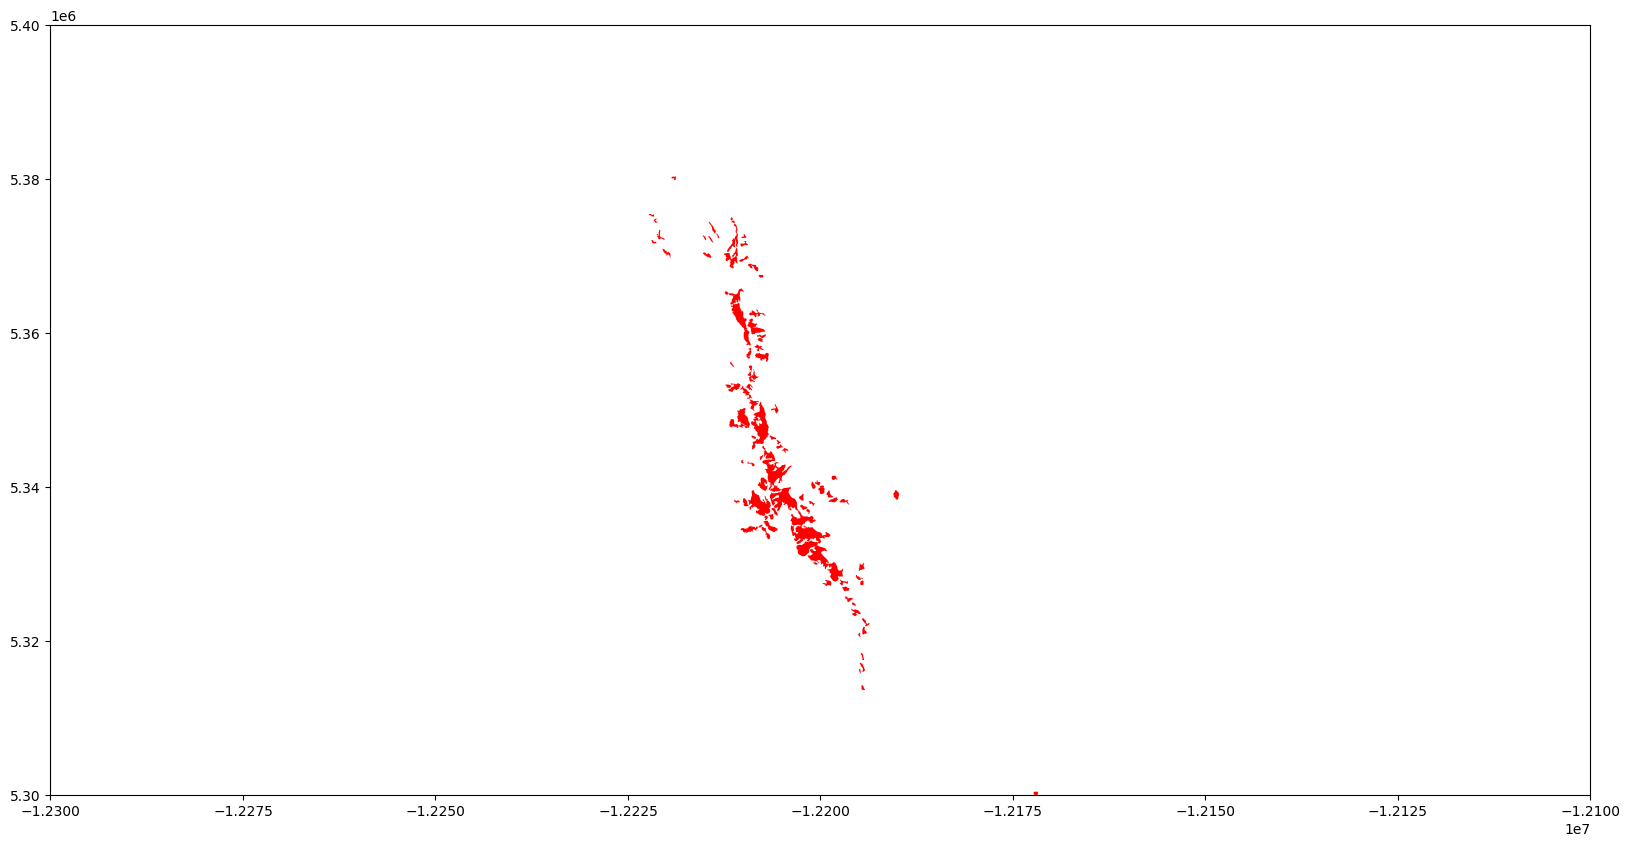

In [ ]:
#Examining the glacier plot
#plotting glacier shapefile
fig, ax = plt.subplots(figsize = (20,10))
glacier.plot(ax=ax, facecolor = 'red')
# Set bounding box for western U.S.
ax.set_xlim([-1.23e7, -1.21e7])
ax.set_ylim([5.3e6, 5.4e6])
plt.show()

##USA and State Boundary Vectors

In [ ]:
# assign usa file to variable (contains more than just shp!)
usa_path = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/USA/s_05mr24.shp")

#using geopandas to read usa file and get coordinate system and show the data frame.
usa = gpd.read_file(usa_path)
#Matching the coordinate reference systems for plotting
#usa = usa.to_crs(tiff.crs)
print(usa.crs)
usa.head()






EPSG:4269


,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.4909 37.00361, -110.4875 37.002..."
4,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.4262 32.79973, -118.42634..."


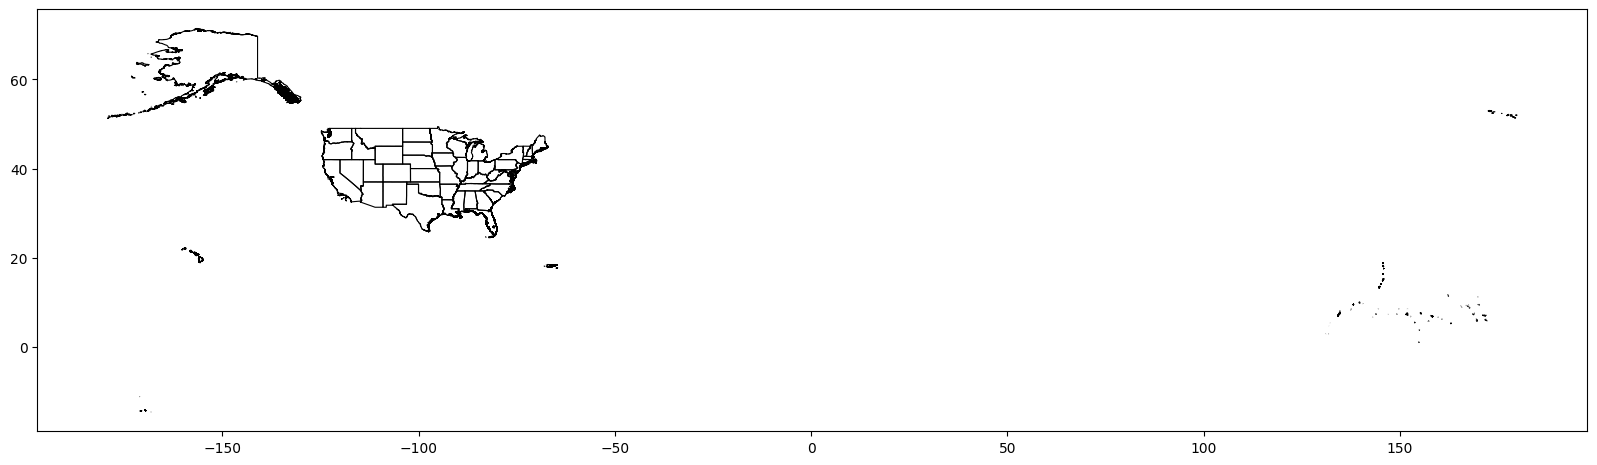

In [ ]:
#plotting usa shapefile

fig, ax = plt.subplots(figsize = (20,10))
usa.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)

plt.show()

In [ ]:
#filter the USA datarame
usa_2 = usa[usa['NAME'].isin(['Wyoming', 'Montana'])]

usa_2.head()


,STATE,NAME,FIPS,LON,LAT,geometry
24,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-114.3213 49.00081, -114.2604 49.000..."
49,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.10339 45.00591, -109.0892 45.00..."


###Both Vectors

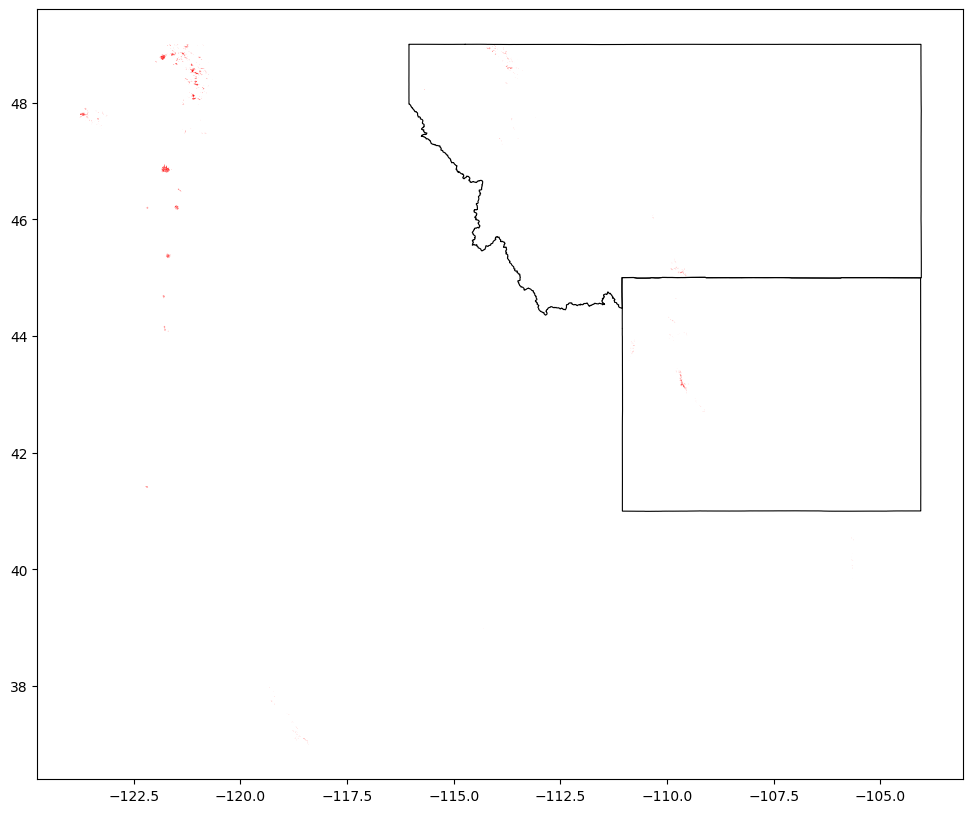

In [ ]:
#plotting glacier2 shapefile
glacier = glacier.to_crs(usa_2.crs)
fig, ax = plt.subplots(figsize = (20,10))
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
glacier.plot(ax=ax, facecolor = 'red')
plt.show()



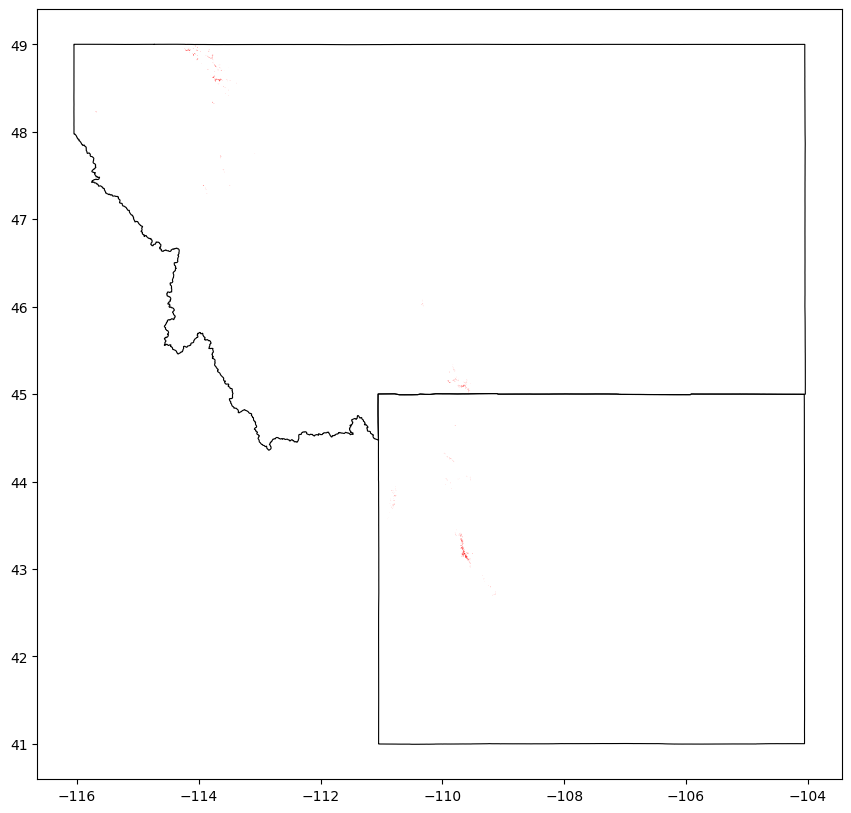

In [ ]:
# Use intersection to clip glacier geometries to the states
usa_2 = usa_2.to_crs(glacier.crs)
glacier_clipped = gpd.overlay(glacier, usa_2, how='intersection')
fig, ax = plt.subplots(figsize=(20, 10))
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
glacier_clipped.plot(ax=ax, facecolor='red')
plt.show()


In [ ]:
#The resulting glacier_clipped dataframe combines the attribute columns from both input layers so there are now about 17 columns
print(glacier_clipped.shape)
glacier_clipped.head()

#now isntead of 1500+ there is less 472

(472, 17)


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,STATE,NAME,FIPS,LON,LAT,geometry
0,67622.587,1053.881,1003.0,-109.55535,43.08424,snow or ice body,USGS DRG,100K,None,1444.159424,127058.256833,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.55614 43.08339, -109.55667 43.0..."
1,176169.290,2094.860,1004.0,-109.56125,43.08842,snow or ice body,USGS DRG,100K,None,2872.514285,331055.777090,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56194 43.08605, -109.56269 43.0..."
2,175583.984,2650.228,1005.0,-109.56718,43.10265,snow or ice body,USGS DRG,100K,None,3633.262144,330108.382208,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56979 43.10027, -109.57122 43.1..."
3,194819.390,1811.623,1006.0,-109.56479,43.09724,snow or ice body,USGS DRG,100K,None,2484.324484,366207.499648,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56652 43.09533, -109.56702 43.0..."
4,257308.589,2749.144,1007.0,-109.58681,43.10225,snow or ice body,USGS DRG,100K,Harrower Glacier,3769.926886,483747.438994,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.58779 43.09962, -109.58808 43.0..."


###Dropping more glaciers for computational limitations


I will randomly drop half the rows to lighten the load on my computer. I could have done this by name or size, but I do not want to bias my analysis to well-studied or famous glaciers. Small glaciers should be represented.

In [ ]:
#showing old shape
print(glacier_clipped.shape)
# Randomly select 50% of the rows
selected_glac = glacier_clipped.sample(frac=0.5, random_state=42)

print(selected_glac.shape)
#proving we still have named and unmaned glacier of various sizes
selected_glac.head()

(472, 17)
(236, 17)


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,STATE,NAME,FIPS,LON,LAT,geometry
55,129790.933,1660.551,1059.0,-109.64226,43.21839,snow or ice body,USGS DRG,100K,None,2282.273731,2.449392e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.63896 43.21887, -109.63902 43.2..."
73,537335.815,5843.927,1077.0,-109.69766,43.23786,snow or ice body,USGS DRG,100K,J Glacier,8031.178864,1.014682e+06,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.70058 43.23934, -109.69983 43.2..."
33,90630.076,1192.128,1037.0,-109.66381,43.36295,snow or ice body,USGS DRG,100K,None,1642.176203,1.718518e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.66501 43.362, -109.66526 43.362..."
278,32004.364,846.957,1359.0,-109.53914,45.12355,snow or ice body,USGS DRG,100K,None,1202.153746,6.443033e+04,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.53791 45.12444, -109.53791 45.1..."
244,331951.829,3524.885,1325.0,-109.62810,45.10162,snow or ice body,USGS DRG,100K,None,5000.125300,6.677724e+05,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.62594 45.10092, -109.62427 45.1..."


##Raster layer: Absolute Change in Annual Precipitation

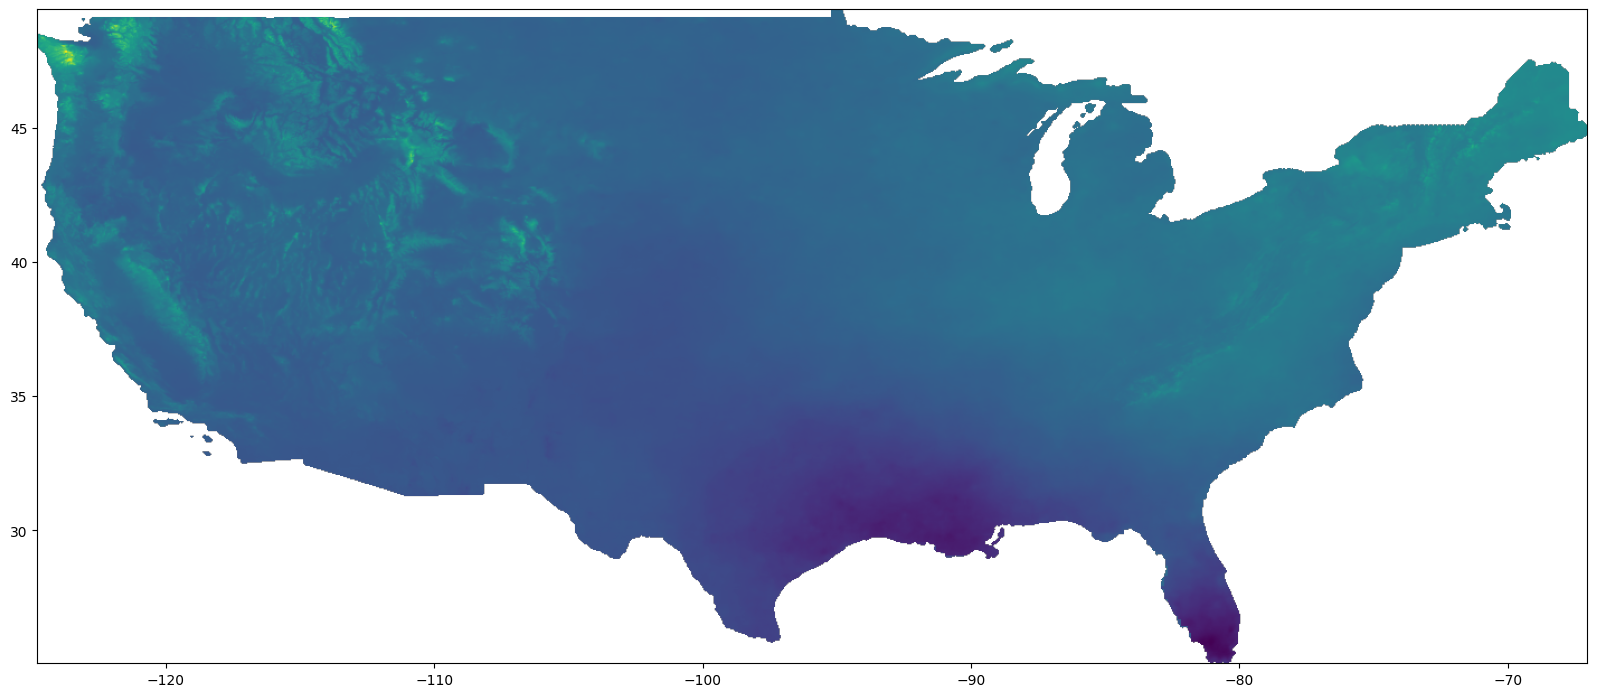

In [ ]:

#assigning url to raster and plotting it with raster.io This shows absolute precipitation change in Alaska.
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)

plt.show()

# Analytical Aproach





I will extract the raster values of the glaciers.

##Plotting the vector on the raster

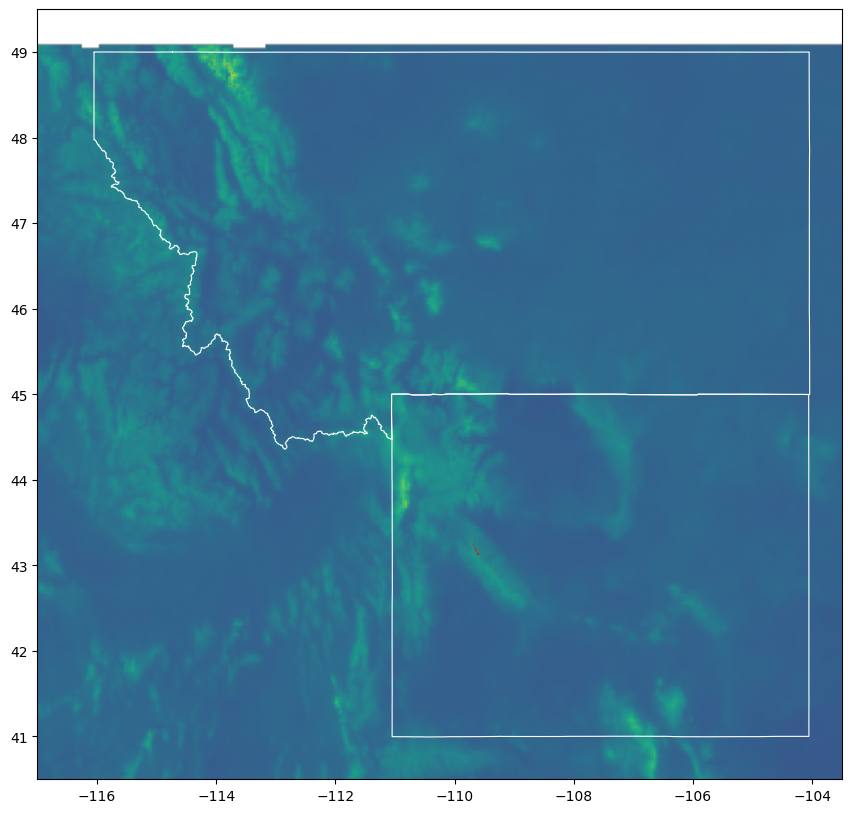

In [ ]:


#Matching the coordinate reference systems for plotting
selected_glac = selected_glac.to_crs(tiff.crs)
usa_2 = usa_2.to_crs(tiff.crs)

# Plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.8)
selected_glac.plot(ax=ax, facecolor = 'red')

# Set bounding box for western U.S.
ax.set_xlim([-117, -103.5])
ax.set_ylim([40.5, 49.5])
plt.show()


##Getting a Closer Look 🔎

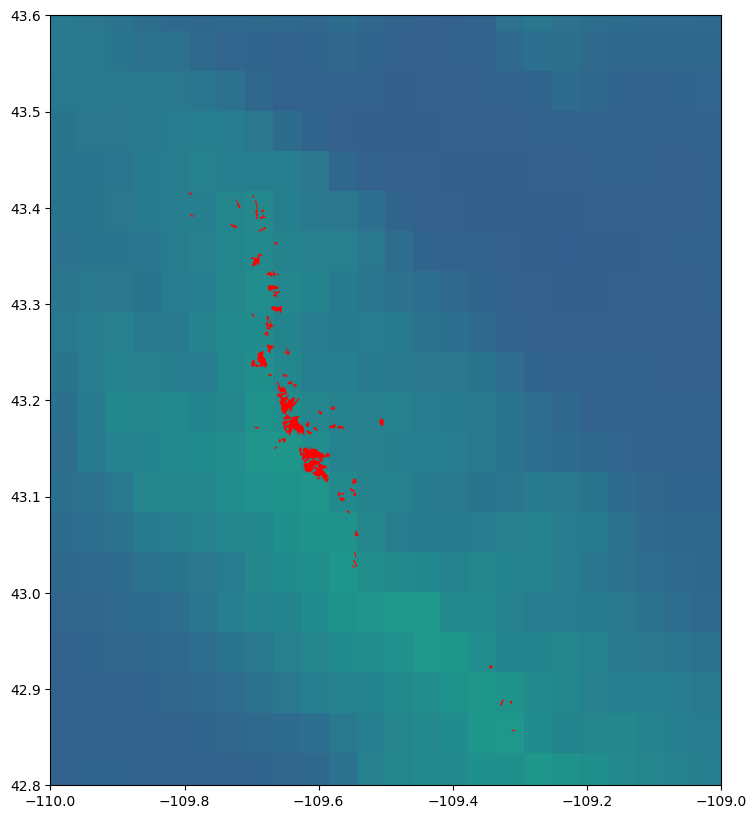

In [ ]:

# Zooming in with tighter bounds. This is the wind river range
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
selected_glac = selected_glac.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
selected_glac.plot(ax=ax, facecolor = 'red')

# Set bounding box for western U.S.
ax.set_xlim([-110, -109])
ax.set_ylim([42.8, 43.6])
plt.show()


# Implement the analysis and/or visualization using Python code.

###Creating a dataframe of extracted mean tempatures for each glacier polygon

In [ ]:
#Installing rasterstats
!pip install rasterstats
from rasterstats import zonal_stats

In [ ]:
#using rasterstats'zonal stats to extract the snow residence of the vector
result = zonal_stats(
    selected_glac,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result
#The result is mostly empty because the glaciers are to small to fully contain even on 4km raster pixel

[{'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': 242.71695198366024},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},


##The fix for the empty values in the result

In [ ]:
#creating buffer around glacier to expand their size

#first reproject to a crs meters not degrees
glacier_proj = selected_glac.to_crs(epsg=32612)

glacier_buffered = glacier_proj.copy()

glacier_buffered['geometry'] = glacier_buffered.buffer(4000)  # buffer outward ~4000 meters so they all conatin at least on 4km pixel
#trying extraction again



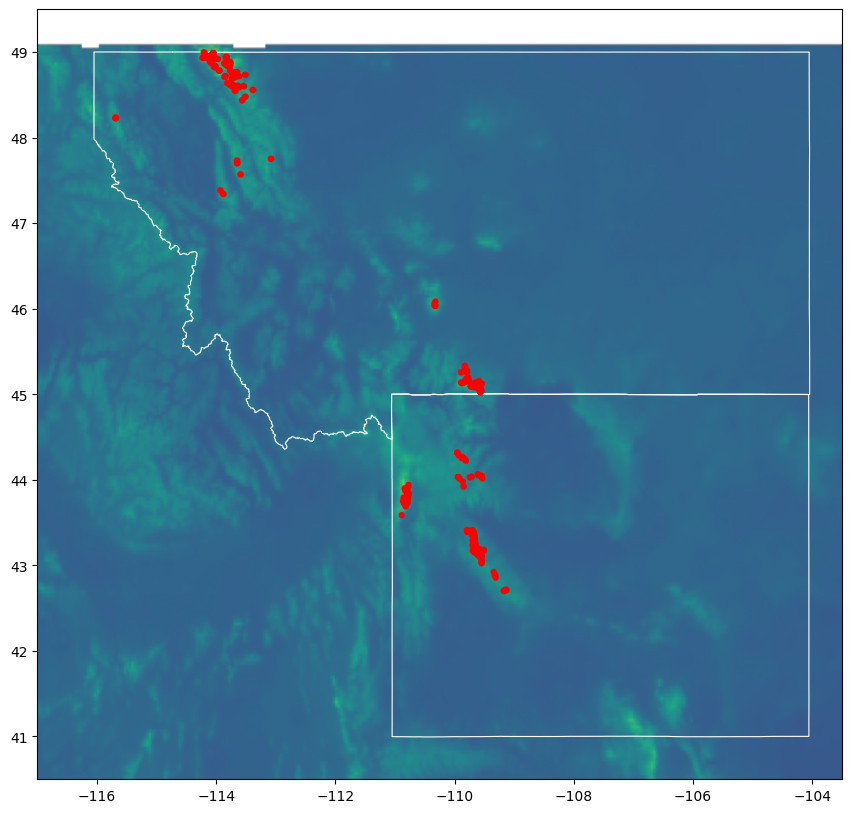

In [ ]:
# Plotting with buffered glacier polygons
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
glacier_buffered = glacier_buffered.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.8)
glacier_buffered.plot(ax=ax, facecolor = 'red')
# Set bounding box for western U.S.
ax.set_xlim([-117, -103.5])
ax.set_ylim([40.5, 49.5])


plt.show()

###The Extraction

It just worked, I wont try to run it again!

In [ ]:
#using rasterstats'zonal stats to extract the raster values of the polygons
result2 = zonal_stats(
    glacier_buffered,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result2

[{'mean': 137.89323126154903},
 {'mean': 143.66139740389679},
 {'mean': 127.077810891153},
 {'mean': 114.64912864953274},
 {'mean': 162.26576459006665},
 {'mean': 135.8177354628575},
 {'mean': 112.30038172589794},
 {'mean': 151.25285406334078},
 {'mean': 227.90030102842397},
 {'mean': 141.78836580096865},
 {'mean': 154.69669380446007},
 {'mean': 304.1770869142626},
 {'mean': 150.30837746292505},
 {'mean': 259.6756939010617},
 {'mean': 124.7678825478848},
 {'mean': 161.69374467343442},
 {'mean': 235.56994020884994},
 {'mean': 254.3629627993821},
 {'mean': 296.8107217126475},
 {'mean': 140.69388888522937},
 {'mean': 137.3861271046692},
 {'mean': 152.89110274428052},
 {'mean': 133.348910726837},
 {'mean': 183.45681812296806},
 {'mean': 140.69388888522937},
 {'mean': 210.77240870267246},
 {'mean': 160.15941952753738},
 {'mean': 144.97419812150304},
 {'mean': 141.76216664732493},
 {'mean': 161.85514884727806},
 {'mean': 263.0054049267916},
 {'mean': 305.78578863337765},
 {'mean': 250.761789

In [ ]:
#Turning that result into a data frame
df = pd.DataFrame(result2)
df.shape



(236, 1)

In [ ]:
# now adding that to the Glacier_Buffered dataframe
glacier_buffered['mean_precip_change'] = df['mean']
glacier_buffered.head()


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,STATE,NAME,FIPS,LON,LAT,geometry,mean_precip_change
55,129790.933,1660.551,1059.0,-109.64226,43.21839,snow or ice body,USGS DRG,100K,None,2282.273731,2.449392e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.66584 43.25243, -109.66469 43.2...",137.088239
73,537335.815,5843.927,1077.0,-109.69766,43.23786,snow or ice body,USGS DRG,100K,J Glacier,8031.178864,1.014682e+06,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.75113 43.23763, -109.75123 43.2...",164.043016
33,90630.076,1192.128,1037.0,-109.66381,43.36295,snow or ice body,USGS DRG,100K,None,1642.176203,1.718518e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.7115 43.34682, -109.71266 43.34...",171.600763
278,32004.364,846.957,1359.0,-109.53914,45.12355,snow or ice body,USGS DRG,100K,None,1202.153746,6.443033e+04,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.58372 45.10302, -109.58378 45.1...",NaN
244,331951.829,3524.885,1325.0,-109.62810,45.10162,snow or ice body,USGS DRG,100K,None,5000.125300,6.677724e+05,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.68525 45.10543, -109.68504 45.1...",NaN
380,45708.847,972.464,911.0,-109.71307,44.03779,snow or ice body,USGS DRG,100K,None,1353.654558,8.864597e+04,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.75443 44.01489, -109.75585 44.0...",NaN
211,55951.592,1351.854,1292.0,-109.59850,45.14843,snow or ice body,USGS DRG,100K,None,1918.216788,1.127378e+05,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.65132 45.15092, -109.65133 45.1...",151.252854
9,177265.790,1802.481,1012.0,-109.61389,43.16663,snow or ice body,USGS DRG,100K,None,2474.589696,3.339683e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.65513 43.14224, -109.65674 43.1...",141.788366
126,26898.597,722.036,1206.0,-113.61170,48.58930,snow or ice body,USGS DRG,100K,None,1091.959270,6.161763e+04,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-113.63165 48.55371, -113.63682 48.5...",250.933444
70,572584.395,3551.943,1074.0,-109.66748,43.31668,snow or ice body,USGS DRG,100K,None,4890.357208,1.084084e+06,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.72569 43.31232, -109.72601 43.3...",227.255799


###Extraction part 2: The whole states' area.

In [ ]:
#using rasterstats'zonal stats to extract the snow residence of the vector
result3 = zonal_stats(
    usa_2,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result3



[{'mean': 52.98385311104591}, {'mean': 53.64129409413954}]

In [ ]:
df2 = pd.DataFrame(result3)
df2.shape
df2.head()

,mean
0,52.983853
1,53.641294


# Buffering stuff i tried to do to make my extraction work but it seems like it works ok now

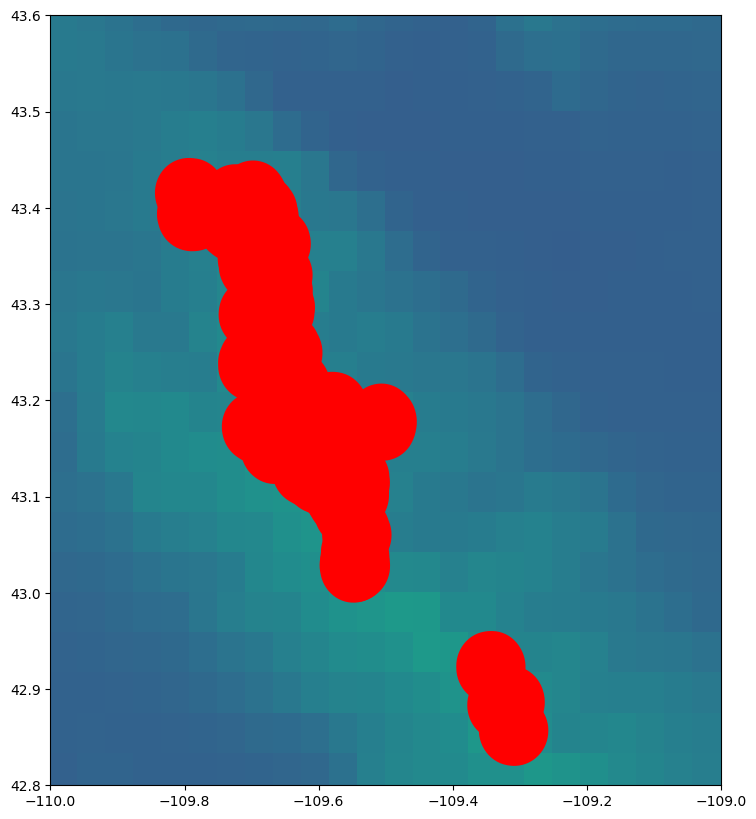

In [ ]:
# Plotting with buffered glacier polygons
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
glacier_buffered = glacier_buffered.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.8)
glacier_buffered.plot(ax=ax, facecolor = 'red')
# Setting the bounding box for the Wind river Range
ax.set_xlim([-110, -109])
ax.set_ylim([42.8, 43.6])


plt.show()

# Trying raster extraction with a minimal subset.

In [ ]:
subset = selected_glac.iloc[0: 30]


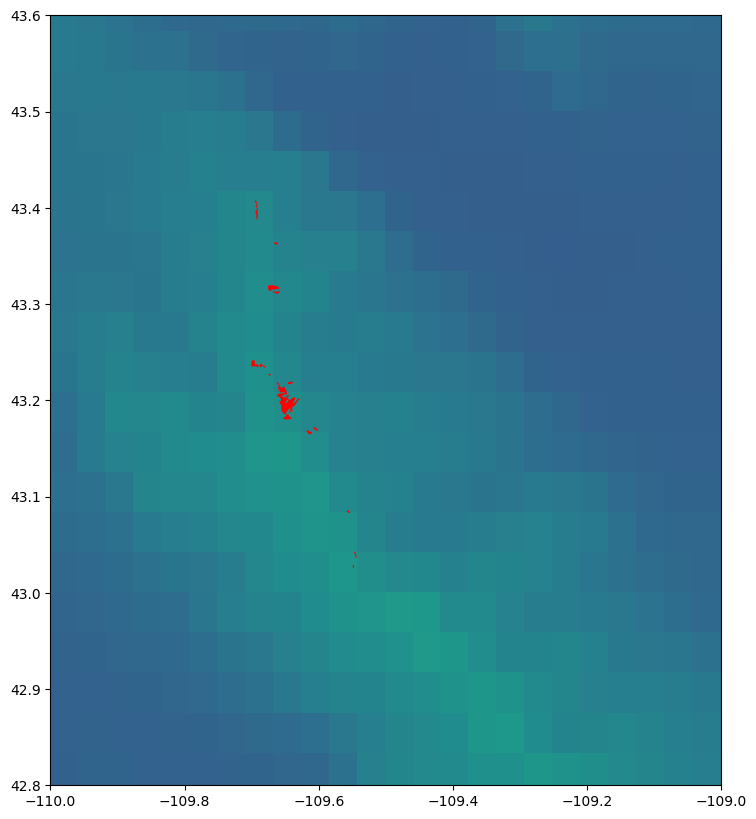

In [ ]:
# Zooming in with tighter bounds. This is thw wind river range
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
subset = subset.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
subset.plot(ax=ax, facecolor = 'red')

# Set bounding box for western U.S.
ax.set_xlim([-110, -109])
ax.set_ylim([42.8, 43.6])
plt.show()

In [ ]:
#using rasterstats'zonal stats to extract the snow residence of the vector
result3 = zonal_stats(
    subset,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result3

[{'mean': 131.38597697719902},
 {'mean': 135.66275683495394},
 {'mean': 125.19154903441418},
 {'mean': 119.0575657360116},
 {'mean': 152.91848022772504},
 {'mean': 126.23221411517451},
 {'mean': 117.36876029778719},
 {'mean': 146.3137194899944},
 {'mean': 228.29773796765332},
 {'mean': 130.761018560721},
 {'mean': 143.522953649576},
 {'mean': 272.770306548457},
 {'mean': 141.8897032301213},
 {'mean': 276.4485284435034},
 {'mean': 119.9290179130157},
 {'mean': 156.26665528147527},
 {'mean': 218.55629714008901},
 {'mean': 229.84023440813823},
 {'mean': 258.309602319589},
 {'mean': 140.70556118631876},
 {'mean': 138.12678333243912},
 {'mean': 146.8002266789799},
 {'mean': 135.56392955494786},
 {'mean': 193.2276337884709},
 {'mean': 141.06143125006875},
 {'mean': 194.68132963693301},
 {'mean': 155.6613297824904},
 {'mean': 138.58065025661182},
 {'mean': 128.4762439843615},
 {'mean': 155.37738173523735}]